In [3]:
import numpy as np
import pylab as plt
from scipy.stats import beta
from scipy.special import gammaln
%matplotlib inline
%load_ext autoreload
%autoreload 2

Synthetic data
========

13


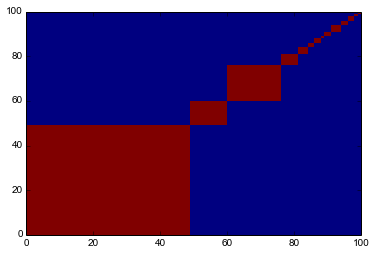

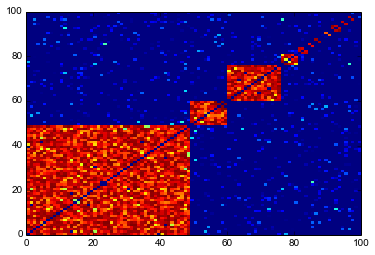

In [2]:
from peak_clusterer import hyper,data_generator
h = hyper()
dg = data_generator(h,n_peaks = 100,seed=1)
dg._make_data()
true_Z = dg.Z
true_post = (true_Z == true_Z[:,np.newaxis])
plt.figure()
plt.pcolor(true_post)
plt.figure()
plt.pcolor(dg.corr_mat)
print dg.K

Creating likelihood matrices
Sample 0
Sample 10
Sample 20
Sample 30
Sample 40
Sample 50
Sample 60
Sample 70
Sample 80
Sample 90
Sample 100
Sample 110
Sample 120
Sample 130
Sample 140
Sample 150
Sample 160
Sample 170
Sample 180
Sample 190
Sample 200
Sample 210
Sample 220
Sample 230
Sample 240
Sample 250
Sample 260
Sample 270
Sample 280
Sample 290
Sample 300
Sample 310
Sample 320
Sample 330
Sample 340
Sample 350
Sample 360
Sample 370
Sample 380
Sample 390
Sample 400
Sample 410
Sample 420
Sample 430
Sample 440
Sample 450
Sample 460
Sample 470
Sample 480
Sample 490
K = 14
Best Log Like = 2336.51796033 (K = 14)


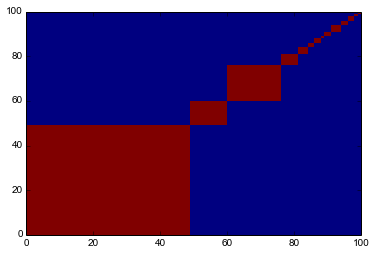

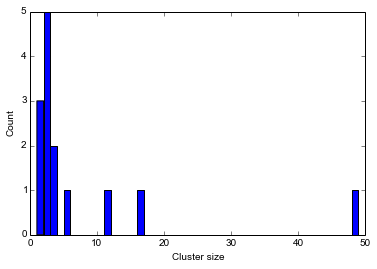

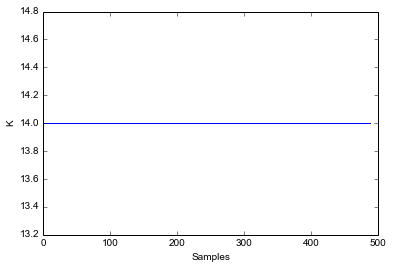

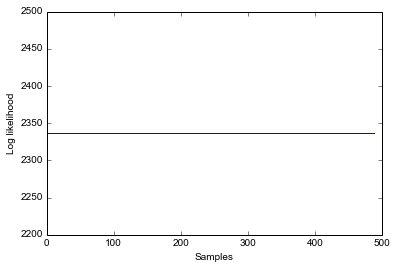

In [3]:
from peak_clusterer import shape_cluster_gibbs
pc = shape_cluster_gibbs(dg.corr_mat,h,infinite=True,track=False,output=1,
                         n_burn=10,n_samples=500,seed=12345)
pc._initialise_clustering()
pc._sample()
pc._summary()

Running greedy clustering
Iteration 0, 100 peaks left
Iteration 1, 52 peaks left
Iteration 2, 37 peaks left
Iteration 3, 27 peaks left
Iteration 4, 25 peaks left
Iteration 5, 23 peaks left
Iteration 6, 21 peaks left
Iteration 7, 19 peaks left
Iteration 8, 16 peaks left
Iteration 9, 12 peaks left
Iteration 10, 9 peaks left
Iteration 11, 8 peaks left
Iteration 12, 7 peaks left
Iteration 13, 6 peaks left
Iteration 14, 4 peaks left
Iteration 15, 3 peaks left
Iteration 16, 2 peaks left
Iteration 17, 1 peaks left

Greedy Clustering Summary
K = 18


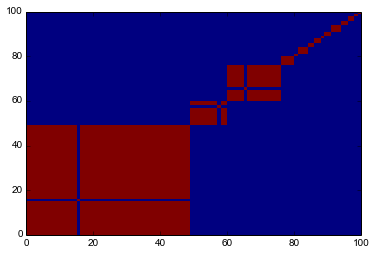

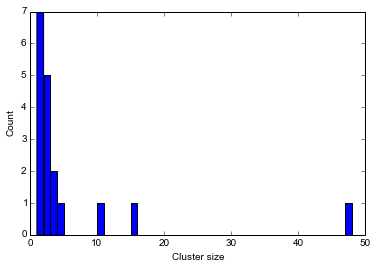

In [4]:
from peak_clusterer import shape_clusterer_greedy
sg = shape_clusterer_greedy(dg.corr_mat,dg.intensities)
sg._cluster()
sg._summary()

Std1 Pos
=====

Try with one file from std1 pos

In [10]:
from peak_clusterer import hyper
import sys

basedir = '../'
sys.path.append(basedir) # need to do this to be able to import the stuff below
from discretisation.preprocessing import FileLoader

loader = FileLoader()
features, corr_mat = loader.load_features(
    '../discretisation/input/std1_pos/std1-file1.csv', 
    load_correlations=True)

4999 features read from ../discretisation/input/std1_pos/std1-file1.csv
Reading peak shape correlations from ../discretisation/input/std1_pos/std1-file1.corr.mat


In [13]:
print type(corr_mat)
print (corr_mat>0).sum()
print corr_mat.shape

<class 'scipy.sparse.csc.csc_matrix'>
272495
(4999, 4999)


(4999, 4999)


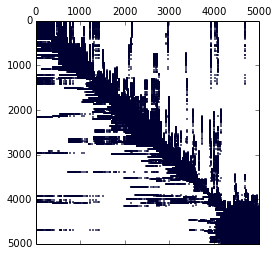

In [5]:
corr_mat = corr_mat.todense()
print corr_mat.shape
plt.figure()
plt.spy(corr_mat, markersize=1)

Note that we use a threshold of 10s when exporting the correlation matrix, i.e. the value of options.rtWindow in below Java code is set to 10.
<pre>
if (Math.abs(signal1rt - signal2rt) < options.rtWindow) {

    if (signal1 == null || signal2 == null) {
        correlation = 0.0;
    } else {
        correlation = measure.correlation(signal1, signal2);
    }
    corrMat.set(n1, n2, correlation); 
    nnz++;

}
</pre>

Try with greedy clustering first

In [6]:
from peak_clusterer import shape_clusterer_greedy

intensities = [f.intensity for f in features]
sg = shape_clusterer_greedy(corr_mat, intensities)

In [7]:
sg._cluster()

Running greedy clustering
Iteration 0, 4999 peaks left


ValueError: objects are not aligned

Hmmmmm ..... will fix later.

In [8]:
from peak_clusterer import shape_cluster_gibbs
h = hyper()
pc = shape_cluster_gibbs(corr_mat, h, infinite=True, track=False, output=1,
                         n_burn=10, n_samples=500, seed=12345)
pc._initialise_clustering()

Creating likelihood matrices


In [22]:
pc._sample()

Sample 0


KeyboardInterrupt: 